<a href="https://colab.research.google.com/github/bereket2sh/myproject/blob/master/Crypto_Currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from sklearn.metrics import mean_squared_error

In [3]:
# Load the data
data = pd.read_csv('ETH-USD.csv')  # Assuming you have downloaded the data and saved it as 'ETH-USD.csv'
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [4]:
# Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [5]:
# Function to create dataset
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

In [6]:
# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]


In [7]:
# Create dataset for training and testing
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [8]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [9]:
# Define LSTM model
def create_lstm_model(layers, units):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    for _ in range(layers-2):
        model.add(LSTM(units, return_sequences=True))
    model.add(LSTM(units))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [10]:
# Define GRU model
def create_gru_model(layers, units):
    model = Sequential()
    model.add(GRU(units, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    for _ in range(layers-2):
        model.add(GRU(units, return_sequences=True))
    model.add(GRU(units))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [11]:
# Function to train and evaluate model
def train_and_evaluate(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train, epochs=20, batch_size=32, verbose=2)
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    # Inverse transform predictions
    train_predict = scaler.inverse_transform(train_predict)
    Y_train = scaler.inverse_transform([Y_train])
    test_predict = scaler.inverse_transform(test_predict)
    Y_test = scaler.inverse_transform([Y_test])
    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
    test_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))
    return train_rmse, test_rmse, train_predict, test_predict

In [12]:
# Experiment with LSTM model
lstm_results = []
for layers in [1, 2, 3, 4]:
    for units in [32, 64, 128, 256]:
        lstm_model = create_lstm_model(layers, units)
        print(f"LSTM Model: Layers={layers}, Units={units}")
        train_rmse, test_rmse, train_predict, test_predict = train_and_evaluate(lstm_model, X_train, Y_train, X_test, Y_test)
        lstm_results.append((layers, units, train_rmse, test_rmse, train_predict, test_predict))

LSTM Model: Layers=1, Units=32
Epoch 1/20
9/9 - 4s - loss: 0.0326 - 4s/epoch - 444ms/step
Epoch 2/20
9/9 - 0s - loss: 0.0168 - 37ms/epoch - 4ms/step
Epoch 3/20
9/9 - 0s - loss: 0.0069 - 36ms/epoch - 4ms/step
Epoch 4/20
9/9 - 0s - loss: 0.0040 - 38ms/epoch - 4ms/step
Epoch 5/20
9/9 - 0s - loss: 0.0043 - 38ms/epoch - 4ms/step
Epoch 6/20
9/9 - 0s - loss: 0.0032 - 35ms/epoch - 4ms/step
Epoch 7/20
9/9 - 0s - loss: 0.0030 - 39ms/epoch - 4ms/step
Epoch 8/20
9/9 - 0s - loss: 0.0026 - 37ms/epoch - 4ms/step
Epoch 9/20
9/9 - 0s - loss: 0.0024 - 39ms/epoch - 4ms/step
Epoch 10/20
9/9 - 0s - loss: 0.0022 - 36ms/epoch - 4ms/step
Epoch 11/20
9/9 - 0s - loss: 0.0021 - 35ms/epoch - 4ms/step
Epoch 12/20
9/9 - 0s - loss: 0.0020 - 37ms/epoch - 4ms/step
Epoch 13/20
9/9 - 0s - loss: 0.0019 - 36ms/epoch - 4ms/step
Epoch 14/20
9/9 - 0s - loss: 0.0019 - 38ms/epoch - 4ms/step
Epoch 15/20
9/9 - 0s - loss: 0.0018 - 43ms/epoch - 5ms/step
Epoch 16/20
9/9 - 0s - loss: 0.0017 - 35ms/epoch - 4ms/step
Epoch 17/20
9/9 - 

In [13]:
# Experiment with GRU model
gru_results = []
for layers in [1, 2, 3, 4]:
    for units in [32, 64, 128, 256]:
        gru_model = create_gru_model(layers, units)
        print(f"GRU Model: Layers={layers}, Units={units}")
        train_rmse, test_rmse, train_predict, test_predict = train_and_evaluate(gru_model, X_train, Y_train, X_test, Y_test)
        gru_results.append((layers, units, train_rmse, test_rmse, train_predict, test_predict))

GRU Model: Layers=1, Units=32
Epoch 1/20
9/9 - 5s - loss: 0.0271 - 5s/epoch - 539ms/step
Epoch 2/20
9/9 - 0s - loss: 0.0057 - 41ms/epoch - 5ms/step
Epoch 3/20
9/9 - 0s - loss: 0.0064 - 40ms/epoch - 4ms/step
Epoch 4/20
9/9 - 0s - loss: 0.0036 - 38ms/epoch - 4ms/step
Epoch 5/20
9/9 - 0s - loss: 0.0035 - 36ms/epoch - 4ms/step
Epoch 6/20
9/9 - 0s - loss: 0.0025 - 35ms/epoch - 4ms/step
Epoch 7/20
9/9 - 0s - loss: 0.0021 - 36ms/epoch - 4ms/step
Epoch 8/20
9/9 - 0s - loss: 0.0018 - 43ms/epoch - 5ms/step
Epoch 9/20
9/9 - 0s - loss: 0.0017 - 44ms/epoch - 5ms/step
Epoch 10/20
9/9 - 0s - loss: 0.0016 - 40ms/epoch - 4ms/step
Epoch 11/20
9/9 - 0s - loss: 0.0014 - 36ms/epoch - 4ms/step
Epoch 12/20
9/9 - 0s - loss: 0.0013 - 37ms/epoch - 4ms/step
Epoch 13/20
9/9 - 0s - loss: 0.0012 - 44ms/epoch - 5ms/step
Epoch 14/20
9/9 - 0s - loss: 0.0011 - 46ms/epoch - 5ms/step
Epoch 15/20
9/9 - 0s - loss: 9.8917e-04 - 42ms/epoch - 5ms/step
Epoch 16/20
9/9 - 0s - loss: 9.0622e-04 - 46ms/epoch - 5ms/step
Epoch 17/20

GRU Model: Layers=1, Units=32
Training RMSE: 65.49087374357195
Testing RMSE: 173.76752600449774


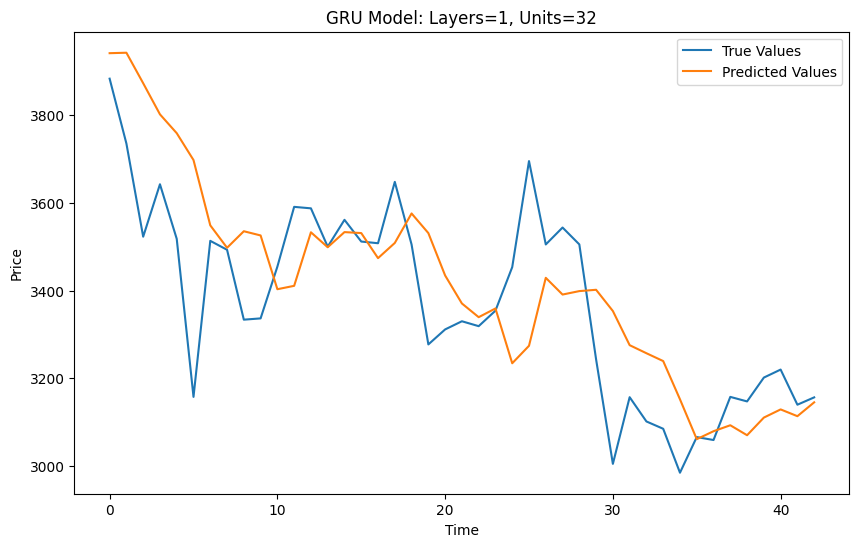

GRU Model: Layers=1, Units=64
Training RMSE: 62.397932272182956
Testing RMSE: 151.73720208897754


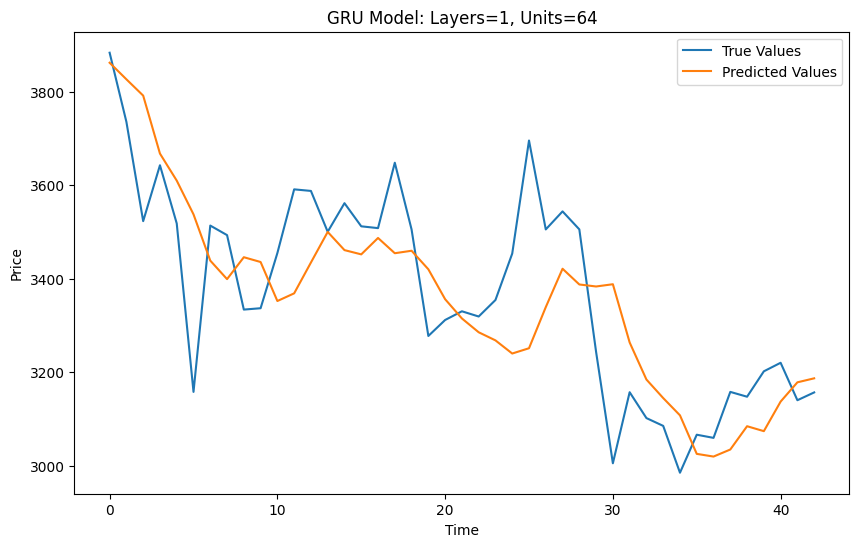

GRU Model: Layers=1, Units=128
Training RMSE: 60.31292636066524
Testing RMSE: 183.87398524265907


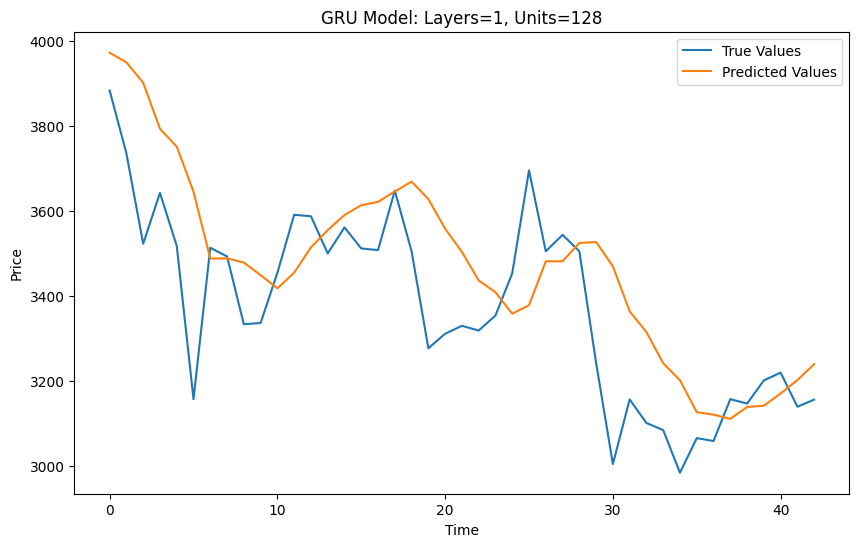

GRU Model: Layers=1, Units=256
Training RMSE: 52.79739855789429
Testing RMSE: 149.14782971026992


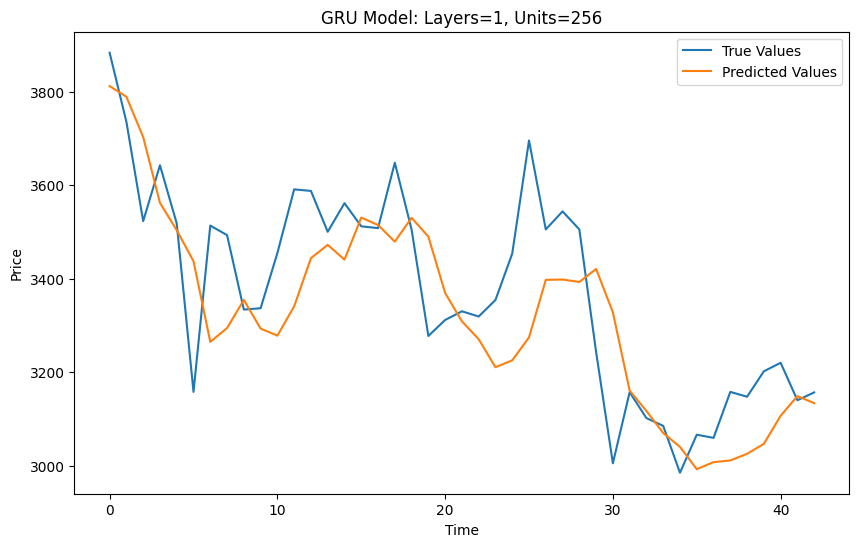

GRU Model: Layers=2, Units=32
Training RMSE: 75.29175158693667
Testing RMSE: 178.16999415500007


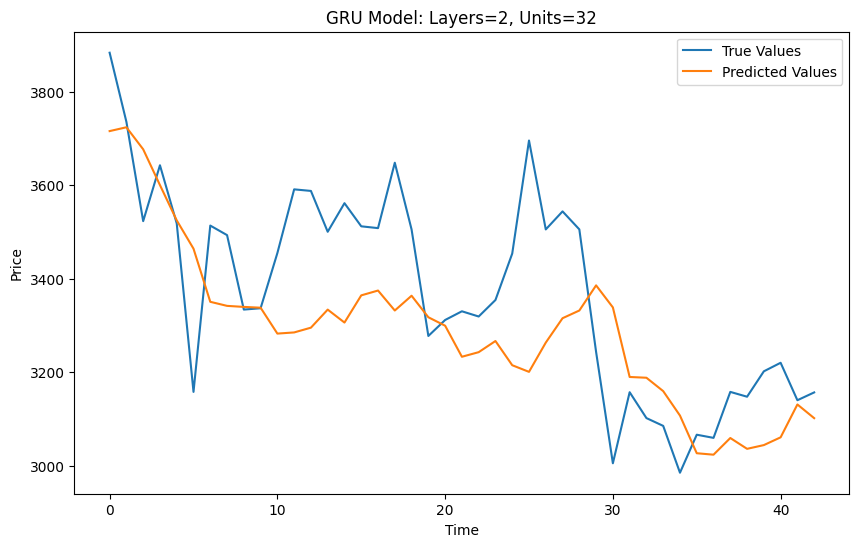

GRU Model: Layers=2, Units=64
Training RMSE: 69.30227696408237
Testing RMSE: 191.4812868063888


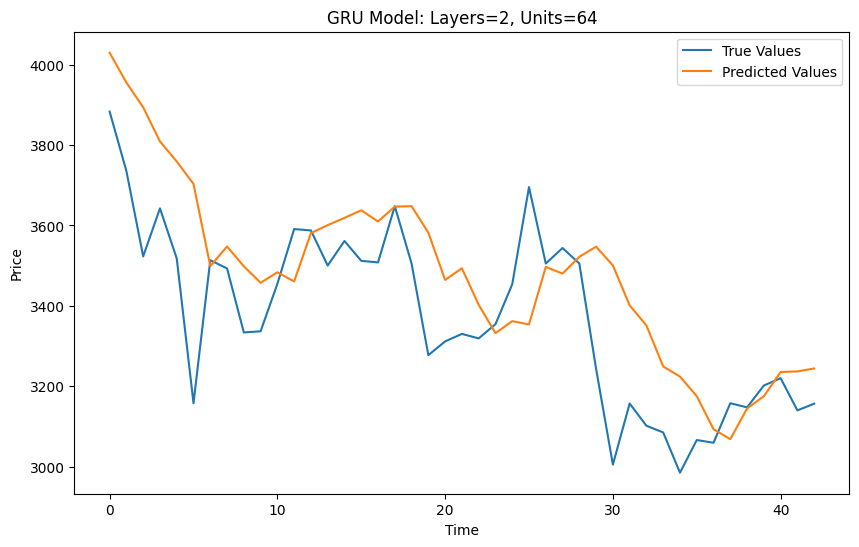

GRU Model: Layers=2, Units=128
Training RMSE: 56.39969365471431
Testing RMSE: 141.4141451755517


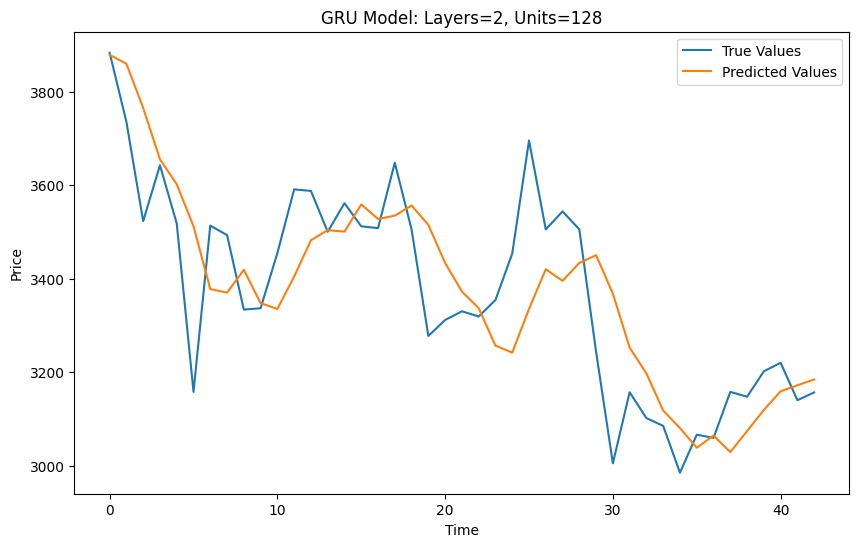

GRU Model: Layers=2, Units=256
Training RMSE: 59.484940465582135
Testing RMSE: 206.8875548621795


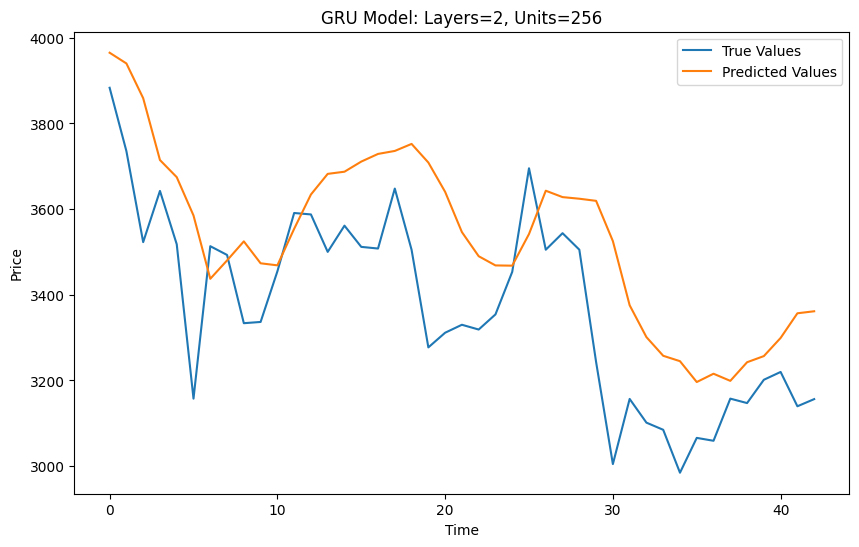

GRU Model: Layers=3, Units=32
Training RMSE: 69.78841294323797
Testing RMSE: 173.05855548282923


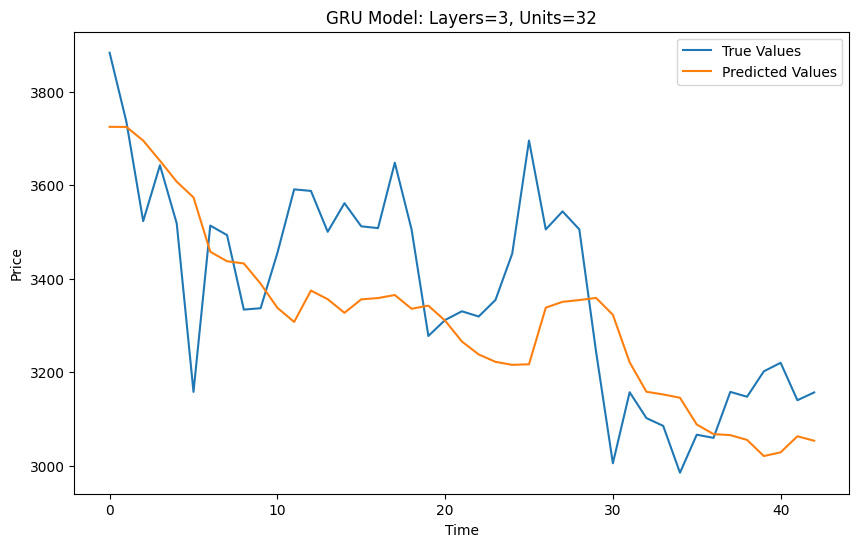

GRU Model: Layers=3, Units=64
Training RMSE: 65.53453349120325
Testing RMSE: 155.82101468082465


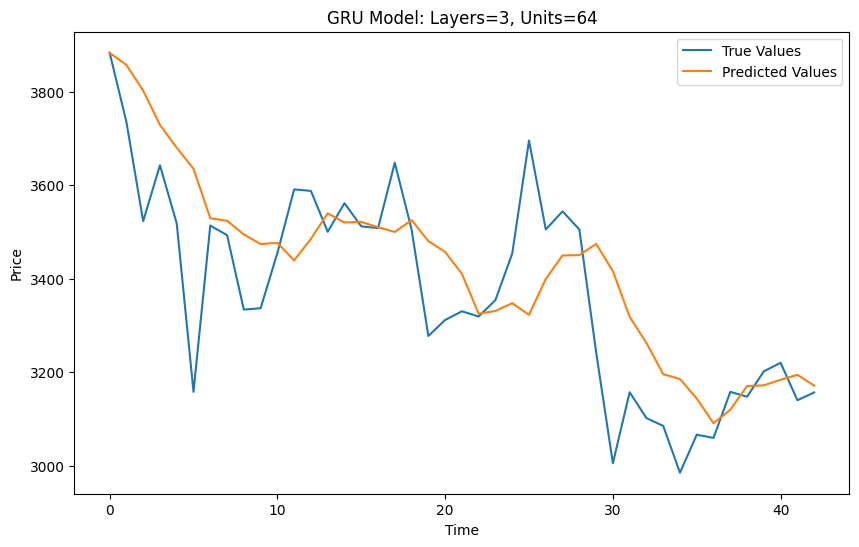

GRU Model: Layers=3, Units=128
Training RMSE: 58.96756711298503
Testing RMSE: 168.35291866934807


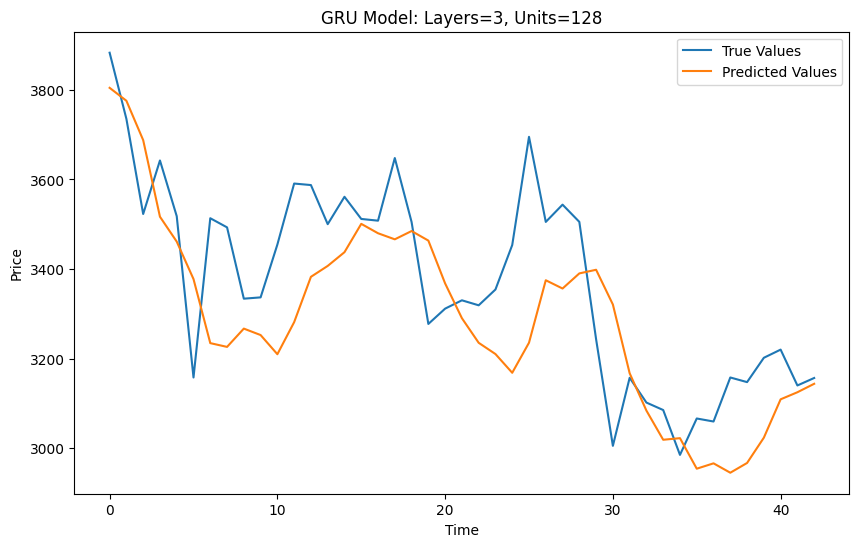

GRU Model: Layers=3, Units=256
Training RMSE: 49.941025078159015
Testing RMSE: 136.74448121764104


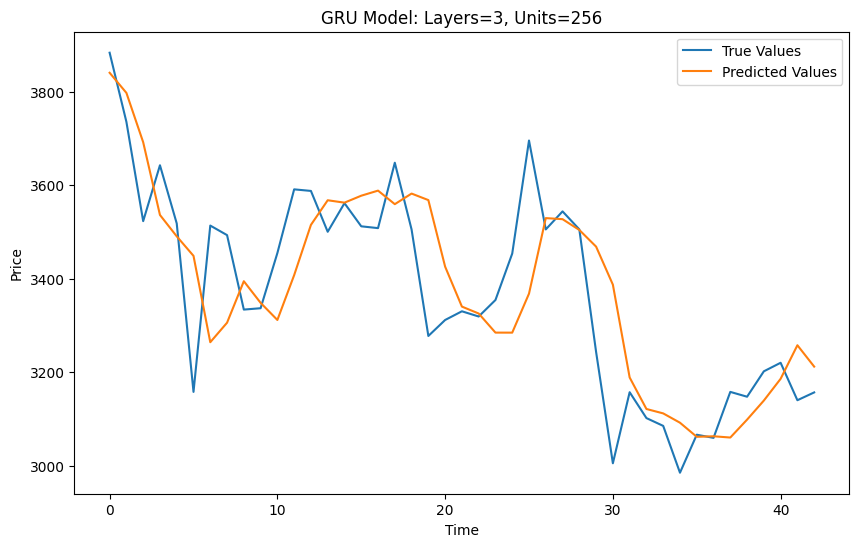

GRU Model: Layers=4, Units=32
Training RMSE: 82.73840771888675
Testing RMSE: 176.5457775572448


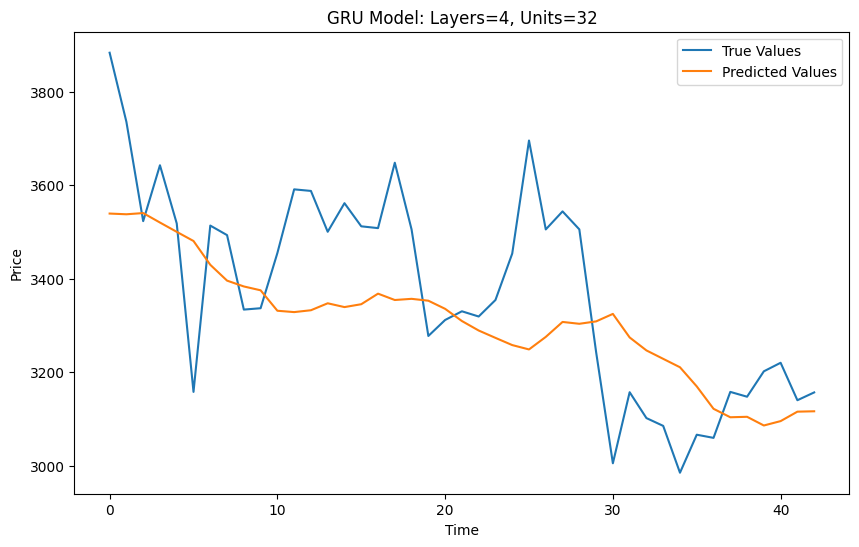

GRU Model: Layers=4, Units=64
Training RMSE: 63.19354330704404
Testing RMSE: 152.88340790849134


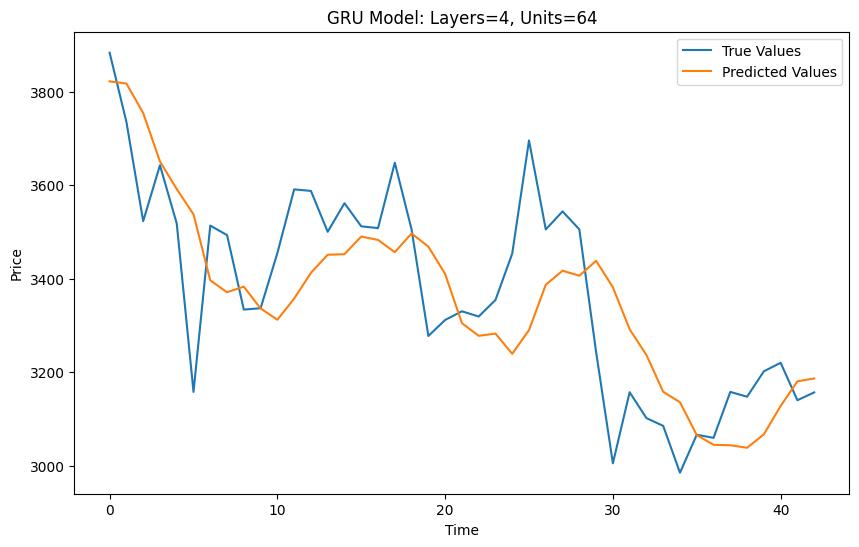

GRU Model: Layers=4, Units=128
Training RMSE: 57.44882006495382
Testing RMSE: 151.1801181843038


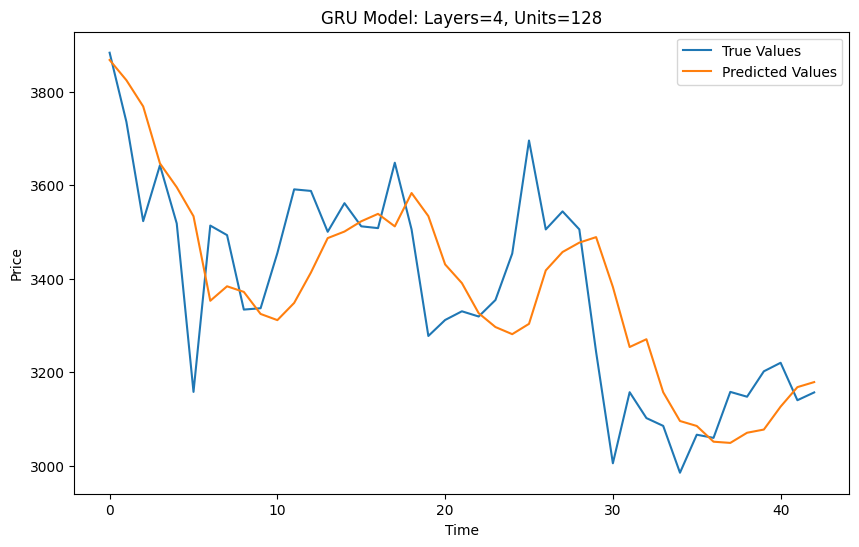

GRU Model: Layers=4, Units=256
Training RMSE: 69.57767441463298
Testing RMSE: 165.57367293409592


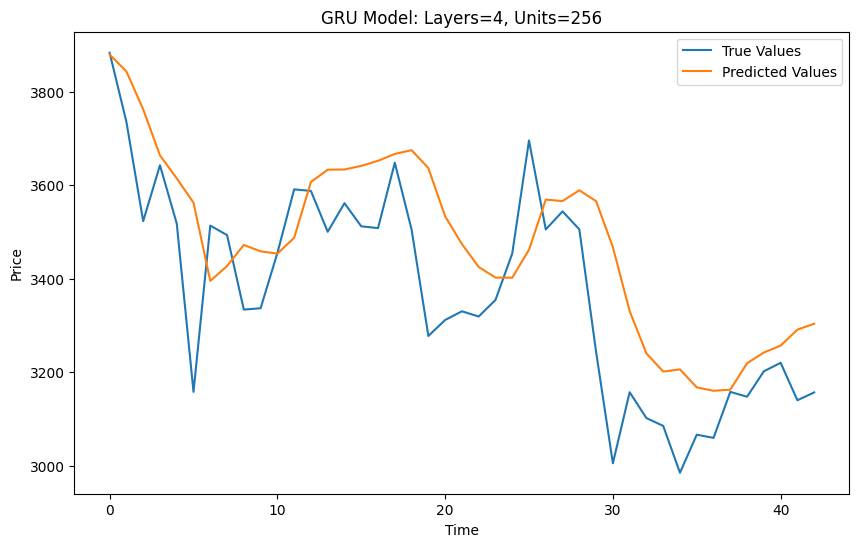

In [14]:
# Extract results for GRU model
for result in gru_results:
    layers, units, train_rmse, test_rmse, train_predict, test_predict = result
    print(f"GRU Model: Layers={layers}, Units={units}")
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    # Plot predicted vs true values
    plt.figure(figsize=(10, 6))
    plt.plot(scaler.inverse_transform(Y_test.reshape(-1,1)), label='True Values')
    plt.plot(test_predict, label='Predicted Values')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f"GRU Model: Layers={layers}, Units={units}")
    plt.legend()
    plt.show()


LSTM Model: Layers=1, Units=32
Training RMSE: 95.73633740712941
Testing RMSE: 344.19567579440184


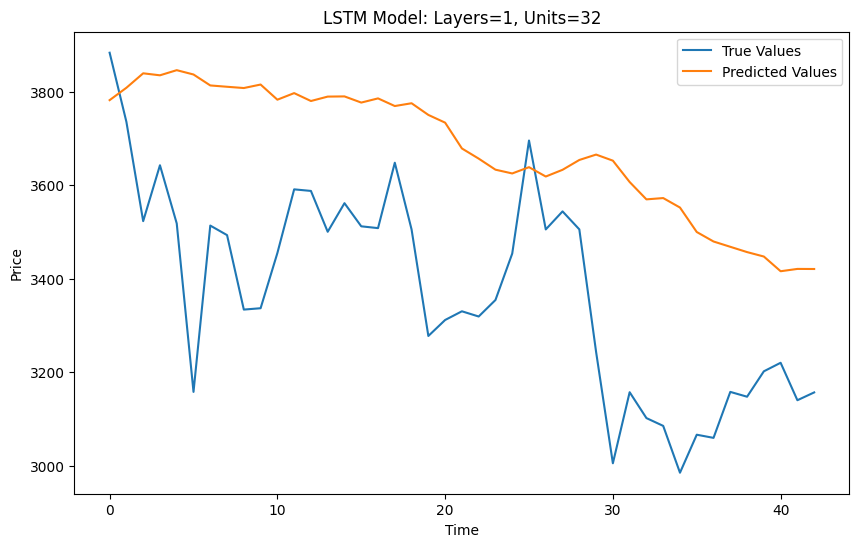

LSTM Model: Layers=1, Units=64
Training RMSE: 78.59666108693338
Testing RMSE: 387.2833831825522


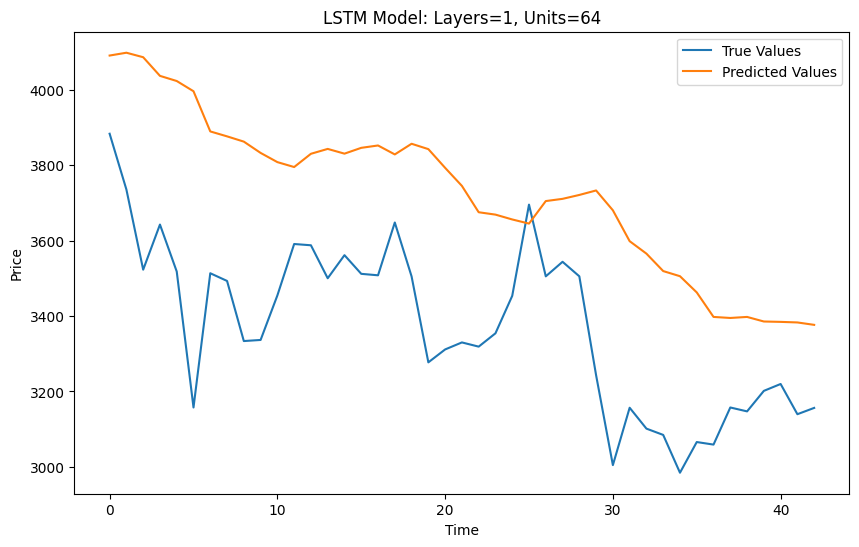

LSTM Model: Layers=1, Units=128
Training RMSE: 68.32624193864365
Testing RMSE: 271.46965354481705


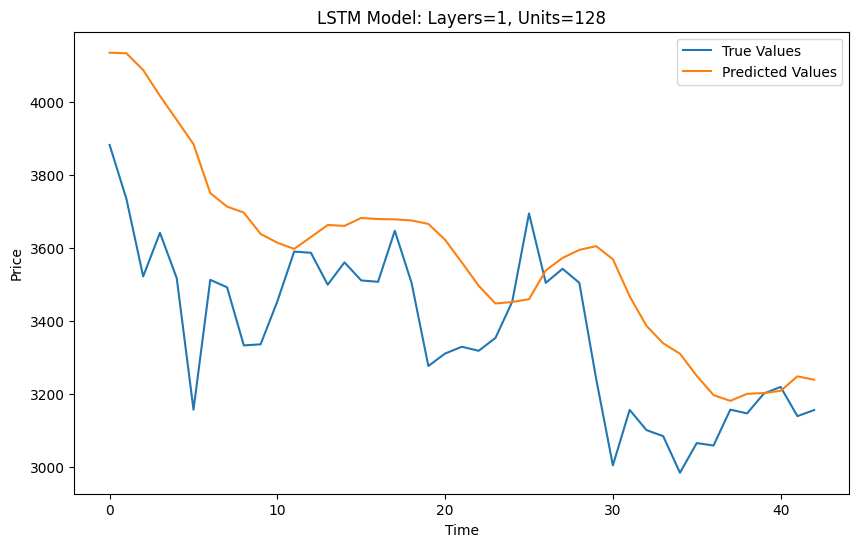

LSTM Model: Layers=1, Units=256
Training RMSE: 62.545277746478405
Testing RMSE: 195.00204982424972


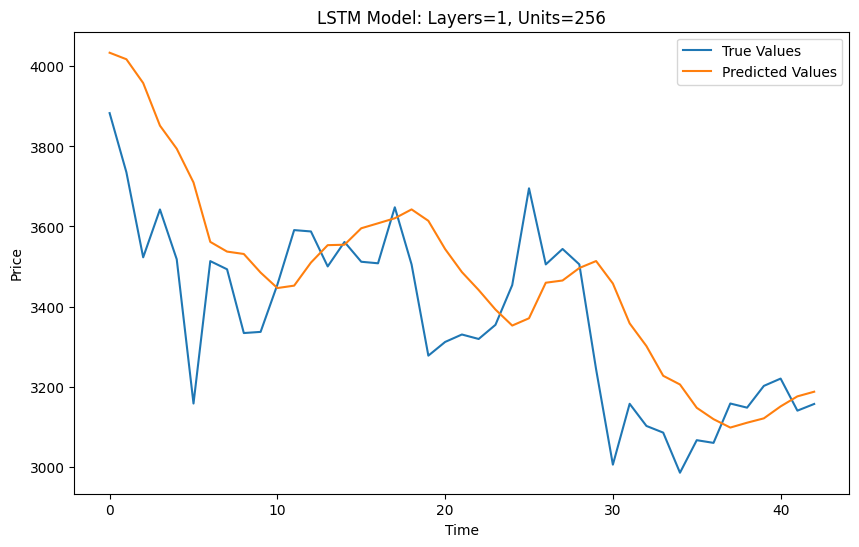

LSTM Model: Layers=2, Units=32
Training RMSE: 93.09048206800068
Testing RMSE: 304.4397923773335


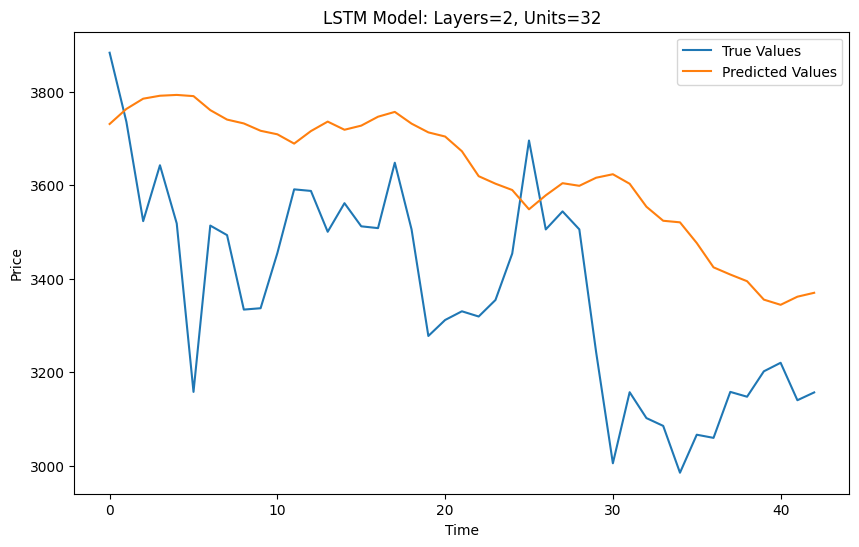

LSTM Model: Layers=2, Units=64
Training RMSE: 77.31053113572746
Testing RMSE: 338.0964958170685


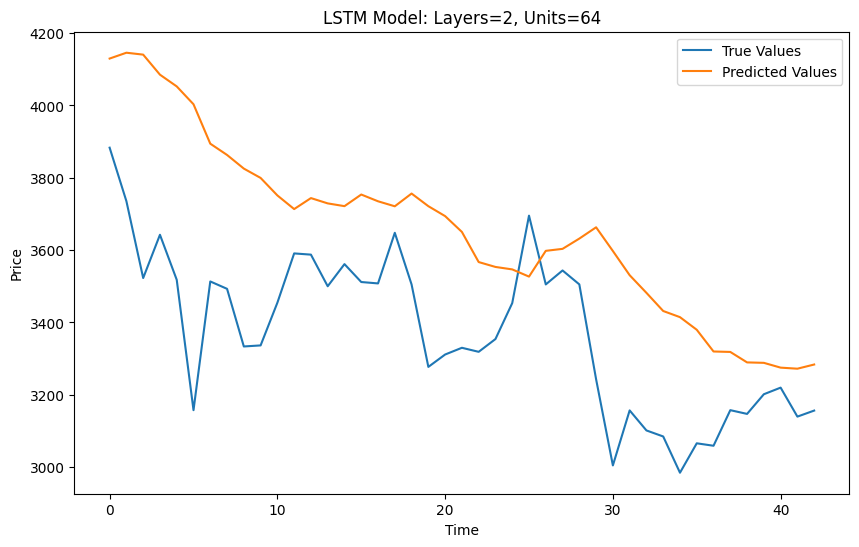

LSTM Model: Layers=2, Units=128
Training RMSE: 70.80630799775052
Testing RMSE: 190.19798115265425


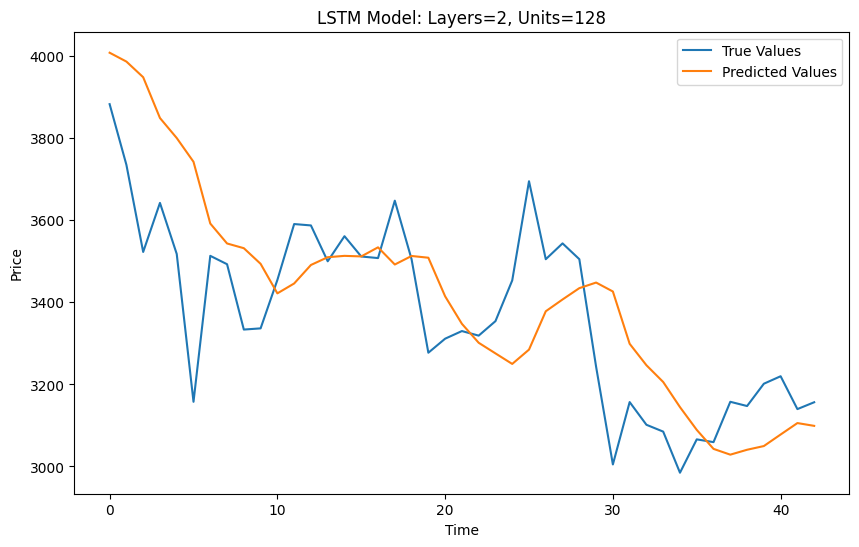

LSTM Model: Layers=2, Units=256
Training RMSE: 59.09647795500198
Testing RMSE: 181.81008888354725


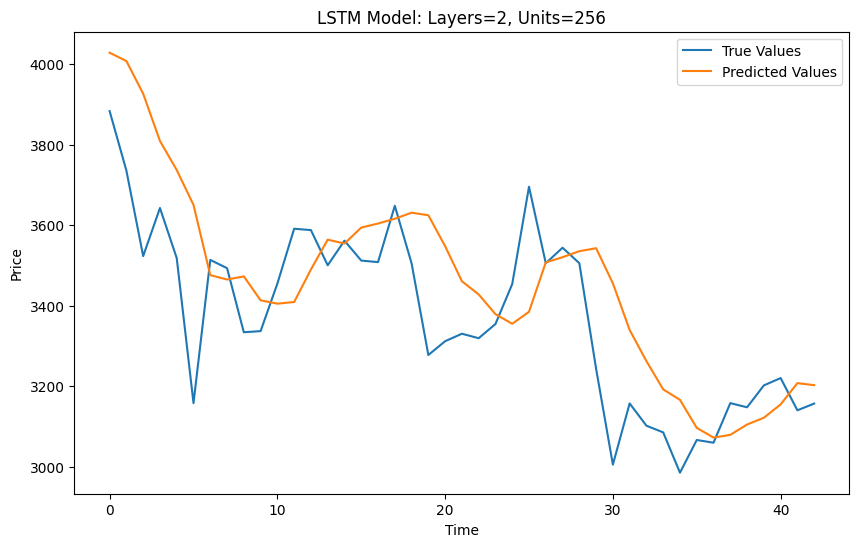

LSTM Model: Layers=3, Units=32
Training RMSE: 101.40558507509425
Testing RMSE: 181.99383365587448


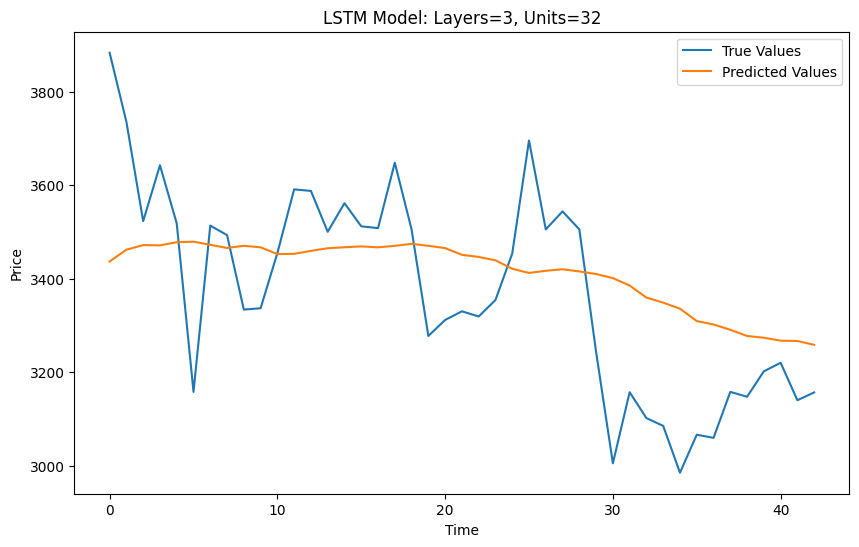

LSTM Model: Layers=3, Units=64
Training RMSE: 88.30536595639653
Testing RMSE: 205.66832743590908


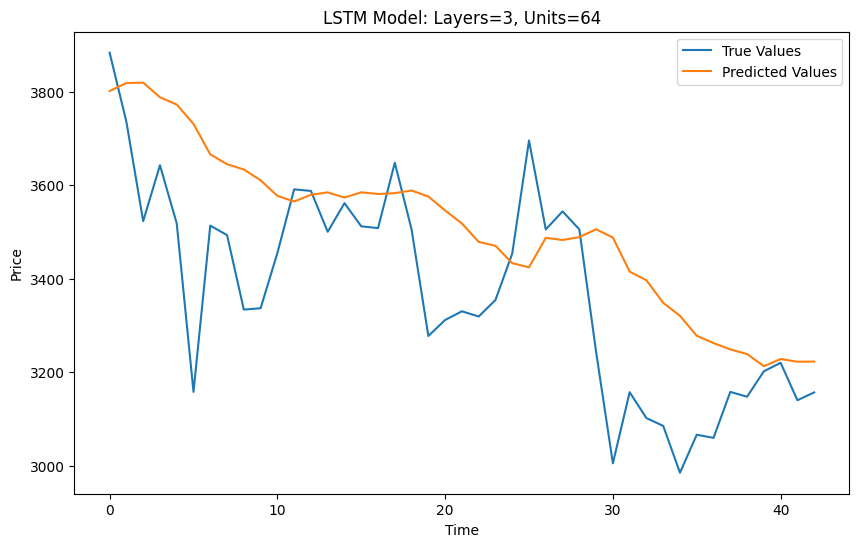

LSTM Model: Layers=3, Units=128
Training RMSE: 68.2080429353241
Testing RMSE: 247.80051749527442


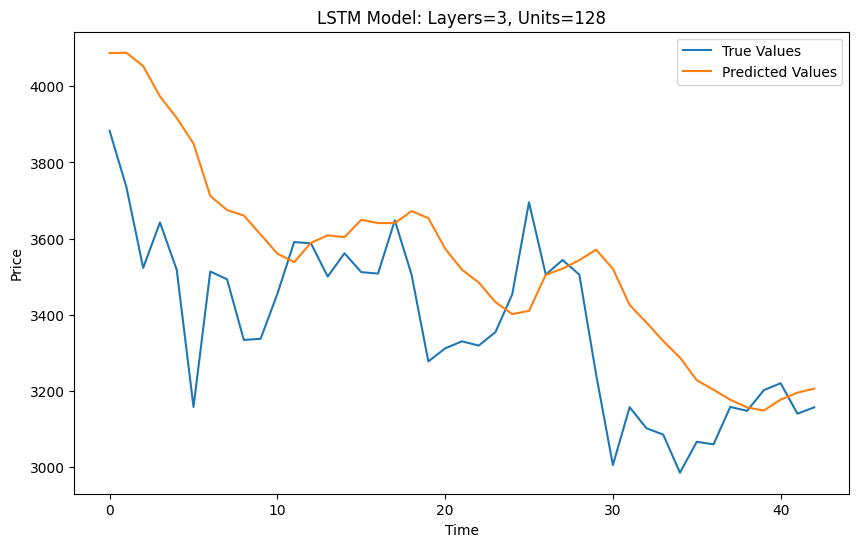

LSTM Model: Layers=3, Units=256
Training RMSE: 73.32679046967027
Testing RMSE: 162.67986755345265


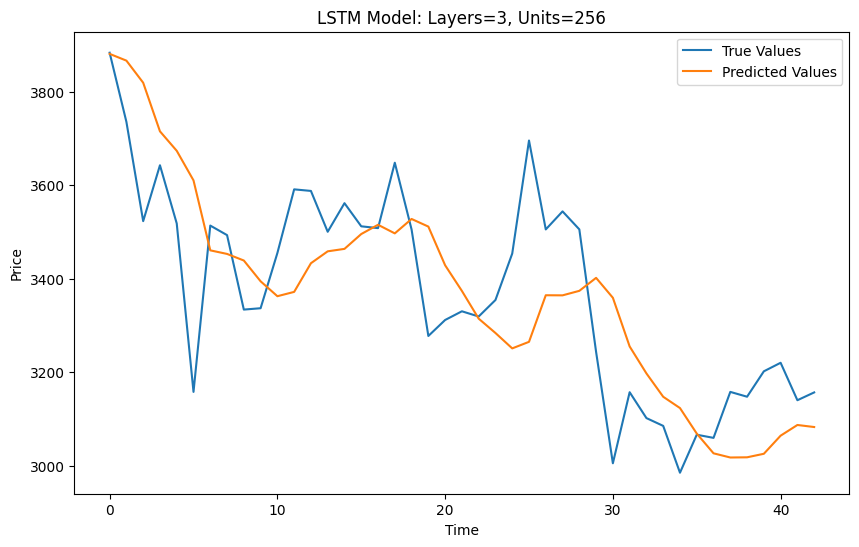

LSTM Model: Layers=4, Units=32
Training RMSE: 99.5584298291236
Testing RMSE: 277.91484956638715


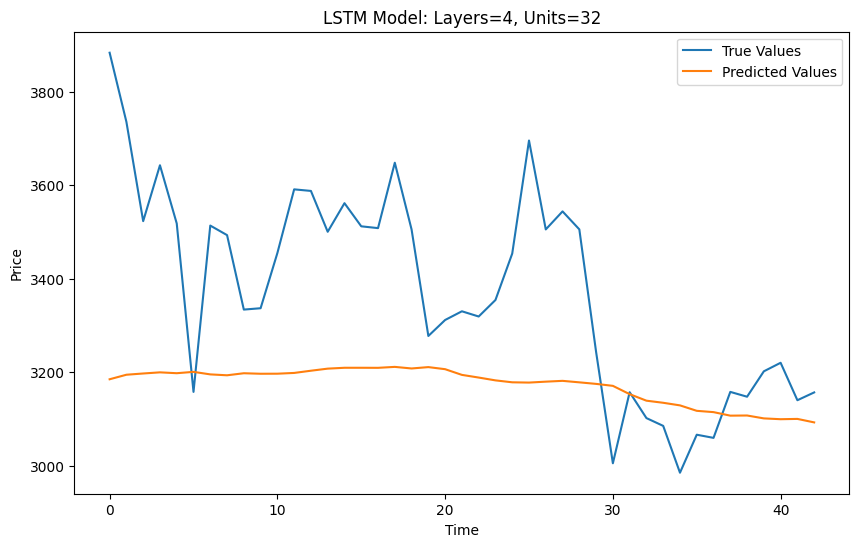

LSTM Model: Layers=4, Units=64
Training RMSE: 92.76478189232104
Testing RMSE: 206.55022998943963


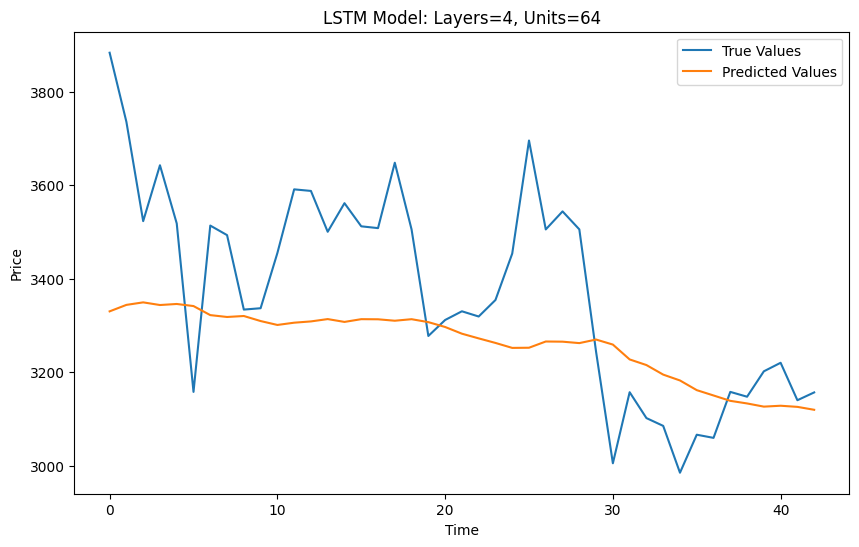

LSTM Model: Layers=4, Units=128
Training RMSE: 86.41220734901702
Testing RMSE: 245.55314617641505


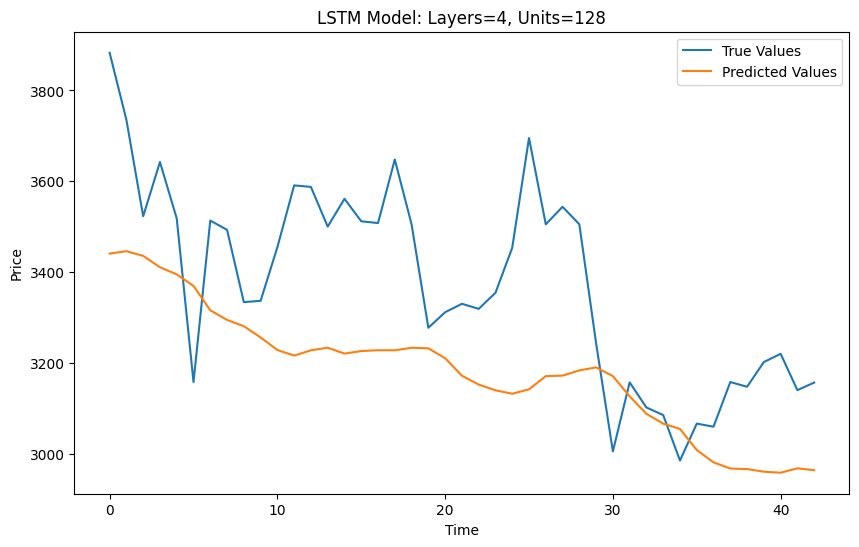

LSTM Model: Layers=4, Units=256
Training RMSE: 68.44964998182049
Testing RMSE: 194.60275879606033


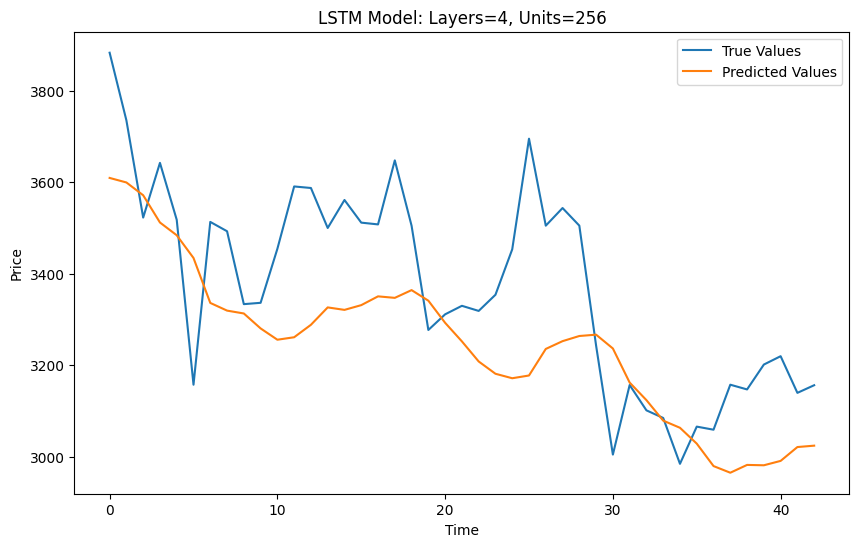

In [15]:
# Extract results for LSTM model
for result in lstm_results:
    layers, units, train_rmse, test_rmse, train_predict, test_predict = result
    print(f"LSTM Model: Layers={layers}, Units={units}")
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    # Plot predicted vs true values
    plt.figure(figsize=(10, 6))
    plt.plot(scaler.inverse_transform(Y_test.reshape(-1,1)), label='True Values')
    plt.plot(test_predict, label='Predicted Values')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title(f"LSTM Model: Layers={layers}, Units={units}")
    plt.legend()
    plt.show()
